<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/ESAA_Week6_Text_Analytics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-1 ESAA 5기 김혜준 개념 필사 - 0415(금) 6주차 과제
 
## <파이썬 머신러닝 완벽 가이드>
## Chapter 8 텍스트 분석

* NLP : 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 발전
  - 텍스트 분석을 향상하게 하는 기반 기술
* 텍스트 분석(텍스트 마이닝) : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 발전
  - 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행
    - 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법 - 지도학습 적용
    - 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법, Text Analytics에서 가장 활발하게 사용되고 있는 분야 - 지도학습, 비지도학습 적용
    - 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
    - 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법, 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법

### 01 텍스트 분석 이해
* 피처 벡터화(피처 추출) : 텍스트를 word(또는 word의 일부분) 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하여 텍스트를 단어의 조합인 벡터값으로 표현하여 변환하는 것
  - BOW(Bag of Words), Word2Vec

#### 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어(Word) 등의 토큰화 작업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업 수행
2. 피터 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 벡터 값 할당
  - BOW(Bag of Words) : Count 기반, TF-IDF 기반
  - Word2Vec
3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가 수행

#### 파이썬 기반의 NLP, 텍스트 분석 패키지
* NLTK : 파이썬의 가장 대표적인 NLP 패키지, 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역 커버, 수행 속도 때문에 실제 대량의 데이터기반에서는 제대로 활용되지 못함
* Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지, Word2Vec 구현 등의 신기능 제공, SpaCy와 함께 가장 많이 사용되는 NLP 패키지
*SpaCy : 뛰어난 수행 성능으로 최근 가장 주목받는 NLP 패키지

### 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화
* 텍스트 정규화 : 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것
  - 클렌징
  - 토큰화
  - 필터링/스톱 워드 제거/철자 수정
  - Stemming
  - Lemmatization

#### 클렌징
텍스트에서 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업

#### 텍스트 토큰화
##### 문장 토큰화
* 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리
* 정규 표현식에 따른 문장 토큰화도 가능
* 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용
* NTLK의 sent_tokenize() : 각각의 문장으로 구성된 list 객체 반환


In [3]:
# 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리하는 예제
from nltk import sent_tokenize
import nltk
nltk.download('punkt') # 마침표, 개행 문자 등의 데이터 세트 다운로드

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


##### 단어 토큰화
* 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어 분리
* 정규 표현식을 이용해 다양한 유형으로 토큰화 수행 가능
* Bag of Word와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분
* NTLK의 word_tokenize() : 각각의 단어로 구성된 list 객체 반환
* n-gram : 연속된 n개의 단어를 하나의 토큰화 단위로 분리 -> 단어 토큰화로 인해 문맥적인 의미가 무시되는 문제 해결


In [4]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [5]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


#### 스톱 워드 제거
* 스톱 워드 : 분석에 큰 의미가 없는 단어
  - 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어
  
    예) is, the, a, will

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
# word_tokens 리스트에서 stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


#### Stemming과 Lemmatization
* 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
*  Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음
  * Stemming : 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
    - NLTK의 Porter, Lancaster, Snowball Stemmer : 필요한 Stemmer 객체 생성한 뒤 이 객체의 stem('단어') 호출
  * Lemmatization : 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾음
    - NLTK의 WordNetLemmatizer : WordNetLemmatizer 객체.lemmatize('단어', '품사') 호출
      - 품사 : 동사 'v', 형용사 'a'

  -> Lemmatization이 Stemming보다 변환에 더 오랜 시간을 필요로 함


In [9]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
amuse amuse amuse
happy happy
fancy fancy


### 03 Bag of Words - BOW
* Bag of Words : 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델
  - 장점 : 쉽고 빠른 구축
  - 단점
    - 문맥 의미 반영 부족
    - 희소 행렬 문제(희소성, 희소 행렬) : BOW로 피처 벡터화를 진행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움 
    
      -> ML 알고리즘의 수행 시간과 예측 성능 개선 위한 특별한 기법 적용 필요
     
     cf) 희소 행렬 : 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬
     
     <-> 밀집 행렬


#### BOW 피처 벡터화
모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경

* 방식
  - 카운트 기반의 벡터화 : 각 문서에서 해당 단어가 나타나는 횟수(Count)를 부여
    - 카운트 값이 높을수록 중요한 단어로 인식
    - 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하는 문제 발생
  - TF-IDF 기반의 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여
    - 문서마다 텍스트의 길이가 길고 문서의 개수가 많은 경우 더 좋은 예측 성능 보장

#### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer
* CountVectorizer : 카운트 기반의 벡터화를 구현한 클래스
  - 피처 벡터화뿐만 아니라 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함꼐 수행
  - 입력 파라미터
    - max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외
    - min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외
    - max_features : 추출하는 피처의 개수를 제한하며 정수로 값을 지정
    - stop_words : 특정 언어의 스톱워드로 지정단 단어는 추출에서 제외
    - n_gram_range : BOW 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정, 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정
    - analyzer : 피처 추출을 수행한 단위를 지정
    - token_pattern : 토큰화를 수행하는 정규 표현식 패턴을 지정
    - tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용
  - fit(), transform()을 통해 피처 벡터화된 객체 반환
  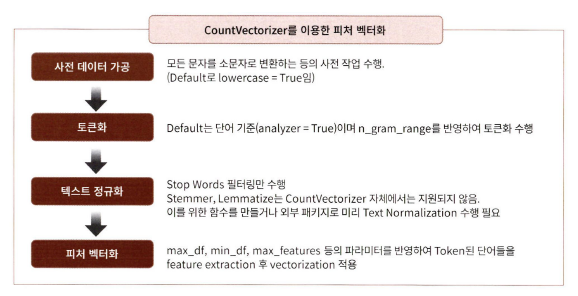

* TfidfVectorizer : TF-IDF 기반의 벡터화를 구현한 클래스


#### BOW 벡터화를 위한 희소 행렬
* 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모
* 희소 행렬이 물리적으로 적은 메모리 공간을 차지하도록 변환하는 방법
  - COO 형식
  - CSR 형식
  
  -> 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 더 뛰어나기 때문에 CSR 형식을 많이 사용

* 사이킷런의 CountVectorizer나 TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 CSR 형태의 희소 행렬

#### 희소 행렬 - COO 형식
* 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식
* Scipy sparse 패키지의 coo_matrix 클래스 이용

In [11]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [14]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [15]:
# 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

#### 희소 행렬 - CSR 형식
* 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식

  -> COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결
* Scipy sparse 패키지의 csr_matrix 클래스 이용

In [16]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


* 실제 사용 시에는 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 생렬로 생성

In [17]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

### 05 감성 분석
#### 감성 분석 소개
* 문서의 주관적인 감성/의견/감정/의견/기분 등을 파악하기 위한 방법
* 소셜 미디아, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용
* 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법 이용
  - 감성 지수
    - 긍정 감성 지수
    - 부정 감성 지수
    
    -> 이들 지수를 합산해 긍정 감성 또는 부정 감성 결정

* 머신러닝 관점에서 감성 분석의 방식
  - 지도학습 : 학습 데이터와 타깃 데이터 레이블 값을 기반으로 감성 분석 학습을 수행 -> 다른 데이터의 감성 분석 예측, 일반적인 텍스트 기반의 분류와 거의 동일
  - 비지도학습 : 감성 어휘 사전 'Lexicon' 이용
  
   - Lexicon : 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단


#### 지도학습 기반 감성 분석 실습 - IMDB 영화평


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd

review_df = pd.read_csv('/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0415(금) 6주차 과제_텍스트 분석(1)/labeledTrainData.tsv', header=0, sep="\t", quoting=3) # 칼럼이 탭(\t)으로 분리
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


* id : 각 데이터의 id
* sentiment : 영화평(review)의 Sentiment 결과 값(Target Label). 1은 긍정적 평가, 0은 부정적 평가를 의미
* review : 영화평의 텍스트

In [22]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

* review 칼럼의 텍스트
  - HTML 형식에서 추출해 `<br />` 태그가 존재
  
    -> replace를 str에 적용해 `<br />` 태그를 공백으로 모두 바꿈
  - 영어가 아닌 숫자/특수문자 존재

    -> 정규 표현식 [^a-zA-Z] 이용 : 영어 대/소문자가 아닌 모든 문자 찾음
    
    -> re.sub("[^a-zA-Z]", " ", x)을 통해 영어 대/소문자가 아닌 모든 문자를 공란으로 변경

In [23]:
import re # 정규 표현식 지원

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [24]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment'] # 결정 값 데이터 세트
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False) # 피처 데이터 세트

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [25]:
# 감상평 텍스트를 피처 벡터화한 후 ML 분류 알고리즘을 적용해 예측 성능 측정 - CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline # 두 가지 작업 한꺼번에 수행
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score # 이진 분류임을 고려해 테스트 데이터 세트의 정확도와 ROC-AUC 모두 측정

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                                        roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.8860, ROC-AUC는 0.9503


In [26]:
# 감상평 텍스트를 피처 벡터화한 후 ML 분류 알고리즘을 적용해 예측 성능 측정 - TfidfVectorizer
# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                                        roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


* TF-IDF 기반 피처 벡터화의 예측 성능이 조금 더 나아짐

#### 비지도학습 기반 감성 분석 소개
* Lexicon 기반
  - 결정된 레이블 값을 가지고 있지 않을 때 유용하게 사용
* Lexicon : 주로 감성만을 분석하기 위해 지원하는 감성 어휘 사전(감성 사전)
  - 감성 지수 : 감성 사전이 갖는 긍정 감성 또는 부정 감성의 정도를 의미하는 수치, 단어의 위치나 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정
  - NLTK 패키지 내 Lexicon 모듈 포함
* NLP 패키지의 WordNet : 방대한 영어 어휘 사전
  - 시맨틱 분석 제공 : 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보 제공

    cf) 시맨틱 : 문맥상 의미
  
    -> 각각의 품사로 구성된 개별 단어를 Synset(Sets of cognitive synonyms) 개념을 이용해 표현

      - Synset : 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념
* NLTK의 감성 사전은 예측 성능이 그리 좋지 못하다는 단점 존재 -> 실제 업무는 다른 감성 사전을 적용하는 것이 일반적
* 대표적인 감성 사전
  - SentiWordNet : NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현, 예측 정확도가 그리 높지 않아 잘 사용하지 않음,  WordNet의 Synset 개념을 감성 분석에 적용
    
    -> Synset별로 3가지 감성 점수(긍정 감성 지수, 부정 감성 지수, 객관성 지수) 할당
    
    -> 문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수 계산
    
    -> 감성이 긍정인지 부정인지 결정
  - VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지, 뛰어난 감성 분석 결과 제공, 비교적 빠른 수행 시간 보장 -> 대용량 텍스트 데이터에 잘 사용
  - Pattern : 예측 성능 측면에서 가장 주목받는 패키지, 파이썬 2.X 버전에서만 동작

    


#### SentiWordNet을 이용한 감성 분석
##### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [27]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

* WordNet의 synsets() : 파라미터로 지정된 단어에 대해 WordNet에 등재된 모든 Synset 객체를 반환 - 여러 개의 SynSet 객체를 가지는 리스트 반환

In [28]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


* POS 태그 : Synset 객체의 파라미터 
  
  예) present.n.01
    - present : 의미
    - n : 명사 품사
    - 01 : present가 명사로서 가지는 여러 의미를 구분하는 인덱스

* synset : 하나의 단어가 가질 수 있는 여러 가지 시맨틱 정보를 개별 클래스로 나타낸 것
* synset 객체의 속성
  - POS(Part of Speech, 품사) : synset 객체.lexname()
  - 정의 : synset 객체.definition()
  - 부명제 : synset 객체.lemma_names()

In [29]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :', synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

* synset 객체는 단어 간의 유사도를 나타내기 위해 path_similarity() 메서드 제공

In [30]:
# path_similarity()를 이용해 단어의 상호 유사도 살펴보기
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2)
                  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


* lion은 tree와의 유사도가 0.07로 가장 작고, tiger와는 유사도가 0.33으로 가장 큼

* SentiWordNet의 Senti_Synset 클래스 : WordNet의 Synset과 유사
* SentiWordNet 모듈의 senti_synsets() : Senti_Synset 클래스를 리스트 형태로 반환, synsets()와 유사

In [31]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


* SentiSynset 객체
  - 감성 지수
    - 긍정 감성 지수 : pos_score()
    - 부정 감성 지수 : neg_score()
  - 객관성 지수 : obj_score()
* 전혀 감성적이지 않은 단어라면 객관성 지수 = 1, 감성 지수 = 0

In [32]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


* father : 객관성 지수 = 1, 긍정/ 부정 감성 지수 = 0

  => 객관적인 단어
* fabulous : 긍정 감성 지수 = 0.875, 부정 감성 지수 = 0.125

##### SentiWordNet을 이용한 영화 감상평 감성 분석
<SentiWordNet을 이용해 감성 분석을 수행하는 개략적인 순서>

1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정 

In [33]:
# 품사 태깅을 수행하는 내부 함수
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [34]:
# 문서를 문장->단어 토큰->품사 태깅 후에 SentiSynset 클래스를 생성하고 Polarity Score를 합산하는 함수
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [35]:
# swn_polarity(text) 함수를 IMDB 감상평의 개별 문서에 적용해 긍정 및 부정 감성 예측
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [36]:
# SentiWordNet의 감성 분석 예측 성능 확인
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


* 정확도 약 66.13%, 재현율 약 70.91%
  
  -> 전반적인 성능 평가 지표는 만족스러울 만한 수치는 아님

#### VADER를 이용한 감성 분석
* VADER : 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon
  - NLTK의 SentimentIntensityAnalyzer 클래스
  - 사용법
    1. SentimentIntensityAnalyzer 객체 생성
    2. 문서별로 polarity_score() 메서드 호출해 감성 점수 계산
    3. 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단
  - vaderSentiment 패키지에서 SentimentIntensityAnalyzer 클래스 임포트하여 사용할 수도 있음

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


* SentimentIntensityAnalyzer.polarity_scores() : 딕셔너리 형태의 감성 점수 반환
  - 'neg' : 부정 감성 지수
  - 'neu' : 중립적인 감성 지수
  - 'pos' : 긍정 감성 지수
  - 'compound' : neg, neu, pos score를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값
    - compound score 기반으로 부정 또는 긍정 감성 여부 결정
    - 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 판단
    - 상황에 따라 임계값을 적절히 조정하여 예측 성능 조절

In [38]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix( y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target , vader_preds),4))
print("정밀도:", np.round(precision_score(y_target , vader_preds),4))
print("재현율:", np.round(recall_score(y_target, vader_preds),4))

[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.6948
정밀도: 0.6485
재현율: 0.8506


* 정확도가 SentiWordNet보다 향상
* 특히 재현율은 약 85.06%로 매우 크게 향상